In [1]:

'''
Editor: @Hyunhomo
Reference: https://github.com/TobiasGlaubach/python-ml-turbofan
'''

## Import libraries in python
import os
from tqdm import tqdm

import pandas as pd
import padasip as pa
# pa.filters.FilterRLS(n)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import importlib
from scipy.stats import randint, expon, uniform

import sklearn as sk
from sklearn import svm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn import preprocessing
from sklearn import pipeline
from sklearn.metrics import mean_squared_error
from math import sqrt

num_cycles = 3000000


In [2]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1
        
    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [3]:
df_train_ttf_merged = pd.read_csv('Data/01_M02_DC_train_ttf_merged.csv')
df_train_ttf_merged


,time,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORCURRENT,ETCHGASCHANNEL1READBACK,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,TTF_FlowCool Pressure Dropped Below Limit,TTF_Flowcool Pressure Too High Check Flowcool Pump,TTF_Flowcool leak,failure_cycle
0,3283834,67,1,-0.079428,-0.958814,-0.959509,-0.939043,-1.751661,-2.842907,-2.332807,623234.0,9146470.0,632514.0,1
1,3283838,67,1,-0.079419,-0.958928,-0.959651,-0.939043,-1.743905,-2.842907,-2.332807,623230.0,9146466.0,632510.0,1
2,3283842,67,1,-0.079409,-0.959156,-0.960006,-0.939043,-1.743905,-2.841850,-2.332807,623226.0,9146462.0,632506.0,1
3,3283846,67,1,-0.079420,-0.958928,-0.959297,-0.939043,-1.747158,-2.841850,-2.332807,623222.0,9146458.0,632502.0,1
4,3283850,67,1,-0.079430,-0.959269,-0.959438,-0.939043,-1.747158,-2.841850,-2.332807,623218.0,9146454.0,632498.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915372,25136960,67,23,-0.022719,1.545407,0.770271,0.801476,-1.179950,0.565479,0.185082,16.0,6288598.0,10202482.0,15
2915373,25136964,67,23,-0.022719,1.545526,0.769633,0.804920,-1.189708,0.565479,0.185082,12.0,6288594.0,10202478.0,15
2915374,25136968,67,23,-0.022719,1.545763,0.771405,0.806979,-1.194712,0.565479,0.182512,8.0,6288590.0,10202474.0,15
2915375,25136972,67,23,-0.022719,1.546096,0.770556,0.798039,-1.189708,0.570147,0.182512,4.0,6288586.0,10202470.0,15


In [4]:
df_train_ttf_merged[df_train_ttf_merged['failure_cycle'] == 1]

,time,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORCURRENT,ETCHGASCHANNEL1READBACK,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,TTF_FlowCool Pressure Dropped Below Limit,TTF_Flowcool Pressure Too High Check Flowcool Pump,TTF_Flowcool leak,failure_cycle
0,3283834,67,1,-0.079428,-0.958814,-0.959509,-0.939043,-1.751661,-2.842907,-2.332807,623234.0,9146470.0,632514.0,1
1,3283838,67,1,-0.079419,-0.958928,-0.959651,-0.939043,-1.743905,-2.842907,-2.332807,623230.0,9146466.0,632510.0,1
2,3283842,67,1,-0.079409,-0.959156,-0.960006,-0.939043,-1.743905,-2.841850,-2.332807,623226.0,9146462.0,632506.0,1
3,3283846,67,1,-0.079420,-0.958928,-0.959297,-0.939043,-1.747158,-2.841850,-2.332807,623222.0,9146458.0,632502.0,1
4,3283850,67,1,-0.079430,-0.959269,-0.959438,-0.939043,-1.747158,-2.841850,-2.332807,623218.0,9146454.0,632498.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131029,3907052,67,43,-0.022398,1.188186,0.780769,0.527784,-0.053538,0.565479,0.221736,16.0,8523252.0,9296.0,1
131030,3907056,67,43,-0.022398,1.189893,0.784031,0.528473,-0.053538,0.568199,0.221736,12.0,8523248.0,9292.0,1
131031,3907060,67,43,-0.022398,1.188244,0.785806,0.528473,-0.056795,0.568199,0.221736,8.0,8523244.0,9288.0,1
131032,3907064,67,43,-0.022398,1.188586,0.788856,0.531565,-0.056795,0.567441,0.221736,4.0,8523240.0,9284.0,1


In [5]:
## Load fault data if needed
df_01_M02_train_fault_data = pd.read_csv('Data/01_M02_train_fault_data.csv', nrows = num_cycles)
# pd.set_option('display.max_rows', 1000)
# df_01_M02_train_fault_data
# last time row : 25633658

time_FPDBL_fault = df_01_M02_train_fault_data['time'].loc[df_01_M02_train_fault_data['fault_name'] == 'FlowCool Pressure Dropped Below Limit']
time_FPDBL_fault = time_FPDBL_fault[time_FPDBL_fault<25633658]
print (time_FPDBL_fault)


time_FPDBL_fault_cycle1 = time_FPDBL_fault[time_FPDBL_fault<3907068]
# print (time_FPDBL_fault_cycle1)

0      3907068
1      3915070
4      3918310
5      3937494
6      3940162
7      3958954
8      3962388
9      3968458
11     3971424
12     3973348
13     8059958
14     8072052
15     8105258
16     8123030
18     8124986
19     8125434
20     8127122
21     8132488
22     8136008
53    18057900
55    18074648
56    18097634
57    18108796
58    18139306
64    22575152
65    22779500
66    22793870
67    22828180
74    23630826
76    23834942
77    24521052
78    25002546
80    25136976
Name: time, dtype: int64


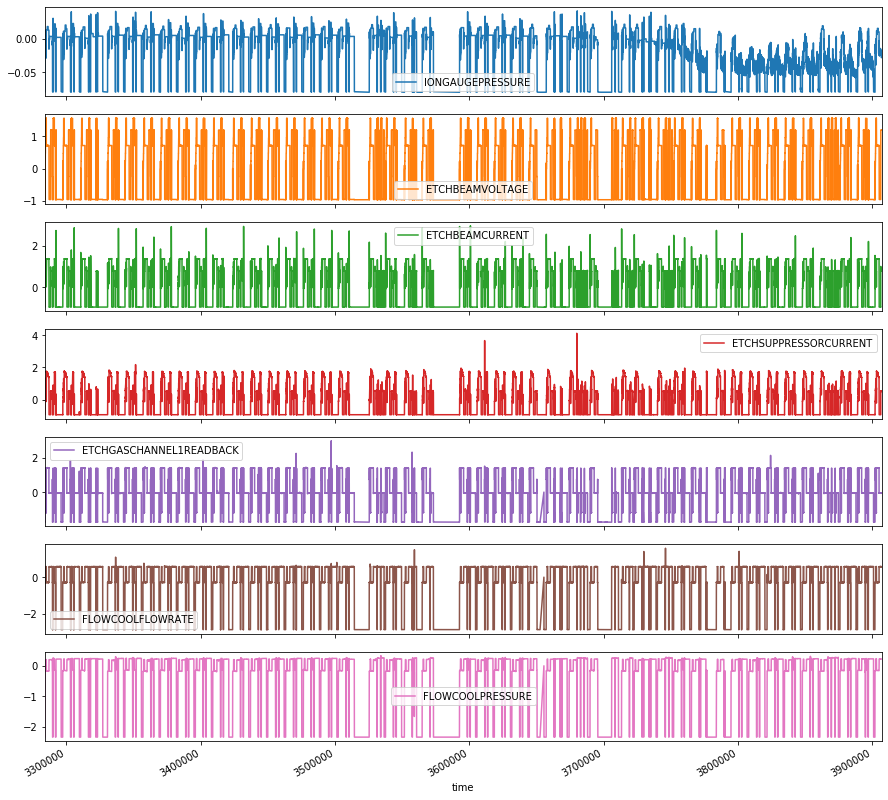

In [6]:
##Plot first cycle 

# df_train_ttf_merged = df_train_ttf_merged[df_train_ttf_merged['recipe_step']!=49]


cols_attributes = ['time','IONGAUGEPRESSURE','ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT', 'ETCHSUPPRESSORCURRENT', 'ETCHGASCHANNEL1READBACK','FLOWCOOLFLOWRATE', 'FLOWCOOLPRESSURE']
t = pd.DataFrame(df_train_ttf_merged[df_train_ttf_merged['failure_cycle'] == 1][cols_attributes].values, columns=cols_attributes).plot(x = 'time', subplots=True, figsize=(15, 15))



In [7]:
# function to reshape features into (samples, time steps, features)
def gen_sequence(id_df, seq_length, seq_cols):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    # for one id I put all the rows in a single matrix
    data_matrix = id_df[seq_cols].values
#     print ("data_matrix", data_matrix)
    print (" data_matrix.shape",  data_matrix.shape)
#     print ("data_matrix.shape[0]", data_matrix.shape[0])
    num_elements = data_matrix.shape[0]
#     print ("num_elements", num_elements)
    # Iterate over two lists in parallel.
    # For example id1 have 192 rows and sequence_length is equal to 50
    # so zip iterate over two following list of numbers (0,112),(50,192)
    # 0 50 -> from row 0 to row 50
    # 1 51 -> from row 1 to row 51
    # 2 52 -> from row 2 to row 52
    # ...
    # 111 191 -> from row 111 to 191
    for start, stop in zip(range(0, num_elements - seq_length - pred_length), range(seq_length, num_elements - pred_length)):
        yield data_matrix[start:stop, :]


        
def gen_target(id_df, seq_length, pred_length, seq_cols):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    # for one id I put all the rows in a single matrix
    data_matrix = id_df[seq_cols].values
#     print (" data_matrix.shape",  data_matrix.shape)
    num_elements = data_matrix.shape[0]

#     print ("num_elements", num_elements)
    # Iterate over two lists in parallel.
    # For example id1 have 192 rows and sequence_length is equal to 50
    # so zip iterate over two following list of numbers (0,112),(50,192)
    # 0 50 -> from row 0 to row 50
    # 1 51 -> from row 1 to row 51
    # 2 52 -> from row 2 to row 52
    # ...
    # 111 191 -> from row 111 to 191
    for start, stop in zip(range(seq_length, num_elements  -pred_length), range(seq_length + pred_length , num_elements )):
        yield data_matrix[start:stop, :]
        
        
        
def gen_labels(id_df, seq_length, label):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    # For one id I put all the labels in a single matrix.
    # For example:
    # [[1]
    # [4]
    # [1]
    # [5]
    # [9]
    # ...
    # [200]]
    data_matrix = id_df[label].values
    num_elements = data_matrix.shape[0]
    # I have to remove the first seq_length labels
    # because for one id the first sequence of seq_length size have as target
    # the last label (the previus ones are discarded).
    # All the next id's sequences will have associated step by step one label as target.
    return data_matrix[seq_length:num_elements- pred_length, :]
        

In [8]:
sequence_length = 100
pred_length = 1

# cycle_idx = 96 # 1~100
# sensor_idx = 14  # 0~13, sensor 2,3,4,7,8,9,11,12,13,14,15,17,20 and 21 in order

# RMSE of first n samples and last n samples
n = 100

cycle_list = df_train_ttf_merged['failure_cycle'].unique()

# cycle_list = cycle_list[[0,1,5,11,12,14]]
# cycle_list = cycle_list[[0,1,5,11,14]]
cycle_list = cycle_list[[0,1,5]]
print (len(cycle_list))
print (cycle_list)


3
[1 2 6]


sensor loop: 1
sequence generated, concatenating...
 data_matrix.shape (13039, 7)
 data_matrix.shape (5902, 7)


  0%|          | 9/9999 [00:00<01:55, 86.51it/s]

concatenated!
RLS for adaptation(other cycles)


100%|██████████| 9999/9999 [01:49<00:00, 91.57it/s]


 data_matrix.shape (131034, 7)


  0%|          | 10/9999 [00:00<01:47, 93.05it/s]

RLS for selected sensor


100%|██████████| 9999/9999 [01:42<00:00, 97.31it/s] 


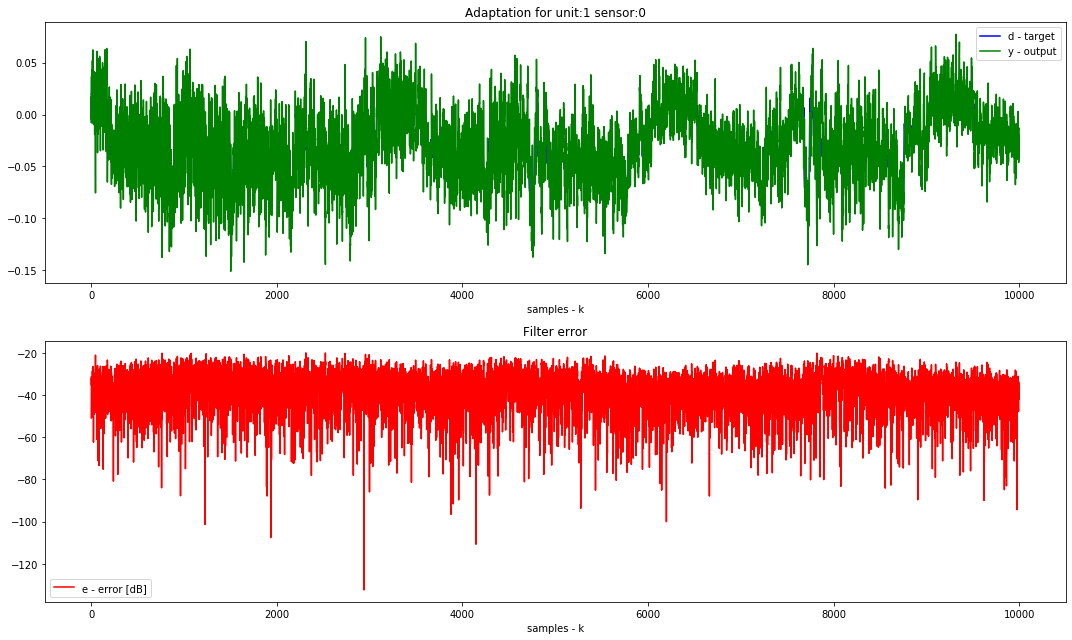

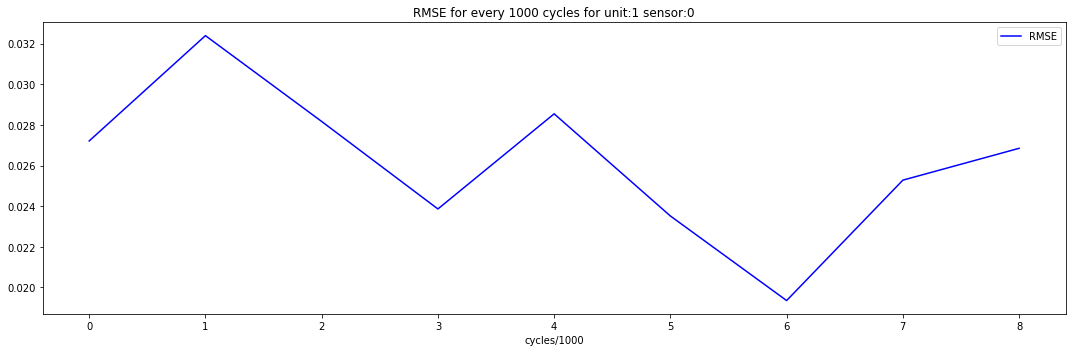

sensor loop: 1
sequence generated, concatenating...
 data_matrix.shape (13039, 7)
 data_matrix.shape (5902, 7)


  0%|          | 10/9999 [00:00<01:47, 92.94it/s]

concatenated!
RLS for adaptation(other cycles)


100%|██████████| 9999/9999 [01:46<00:00, 94.08it/s] 


 data_matrix.shape (131034, 7)


  0%|          | 2/9999 [00:00<08:58, 18.58it/s]

RLS for selected sensor


100%|██████████| 9999/9999 [02:34<00:00, 64.77it/s]


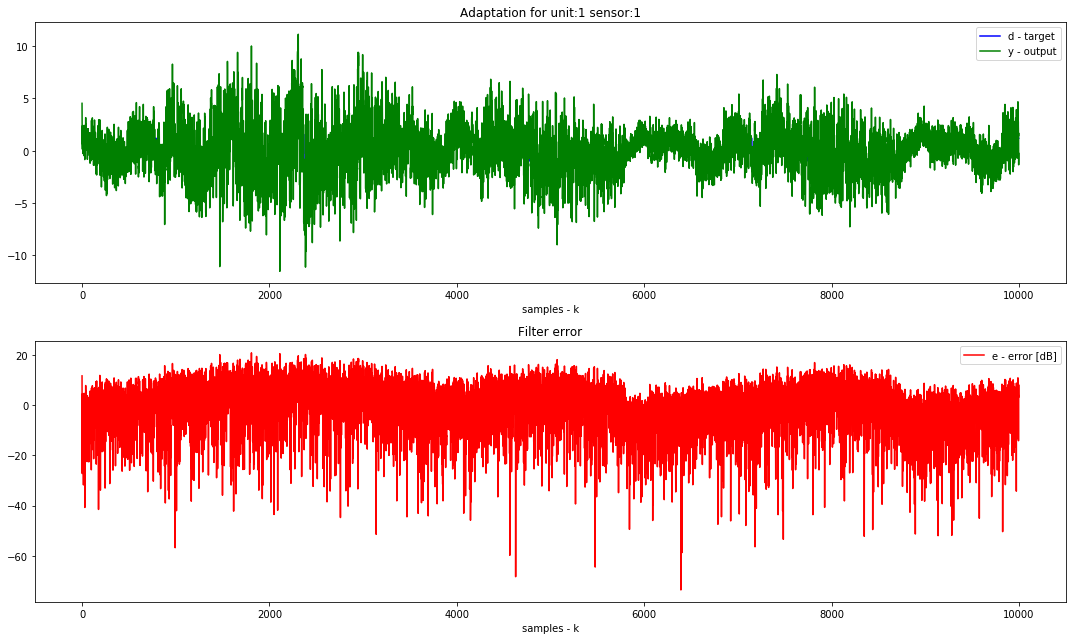

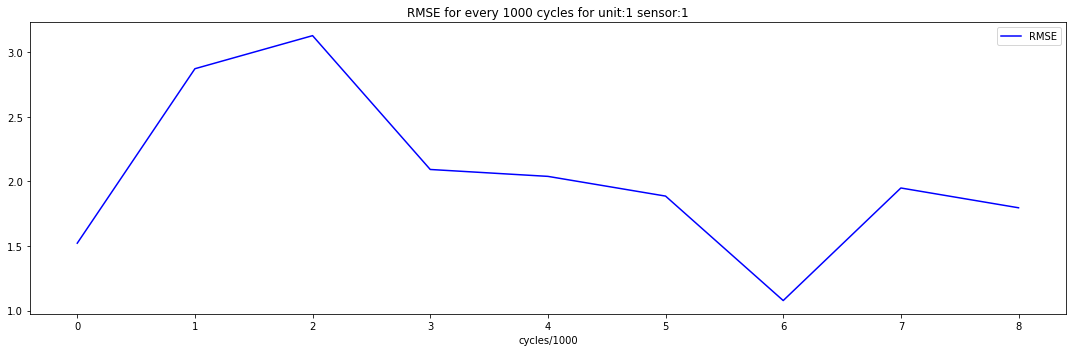

sensor loop: 1
sequence generated, concatenating...
 data_matrix.shape (13039, 7)
 data_matrix.shape (5902, 7)


  0%|          | 7/9999 [00:00<02:30, 66.56it/s]

concatenated!
RLS for adaptation(other cycles)


100%|██████████| 9999/9999 [01:47<00:00, 93.13it/s] 


 data_matrix.shape (131034, 7)


  0%|          | 2/9999 [00:00<08:45, 19.03it/s]

RLS for selected sensor


100%|██████████| 9999/9999 [02:03<00:00, 80.90it/s]


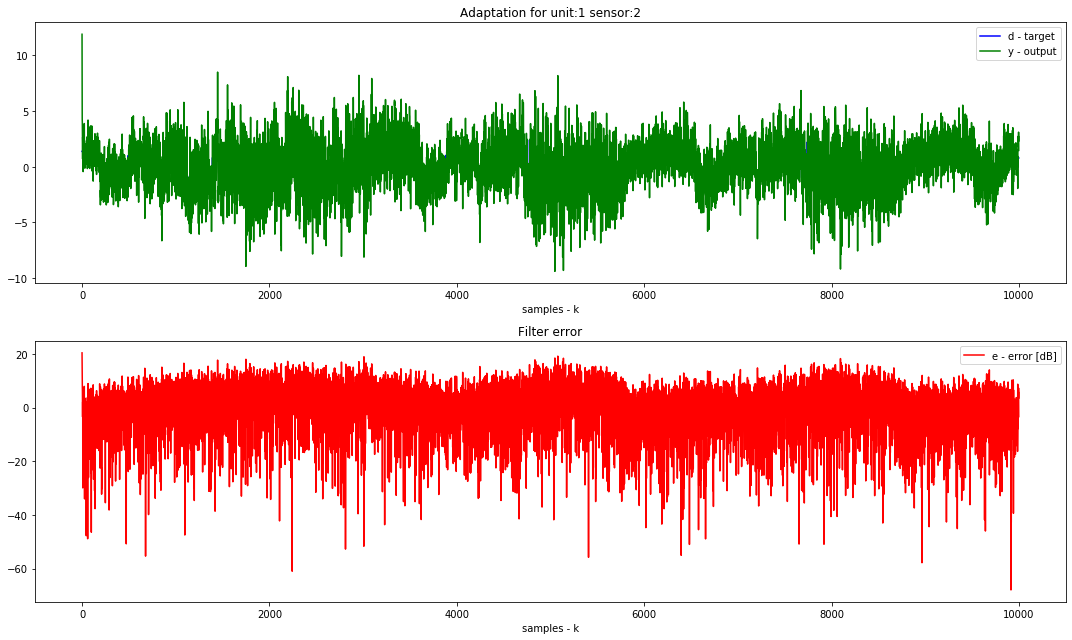

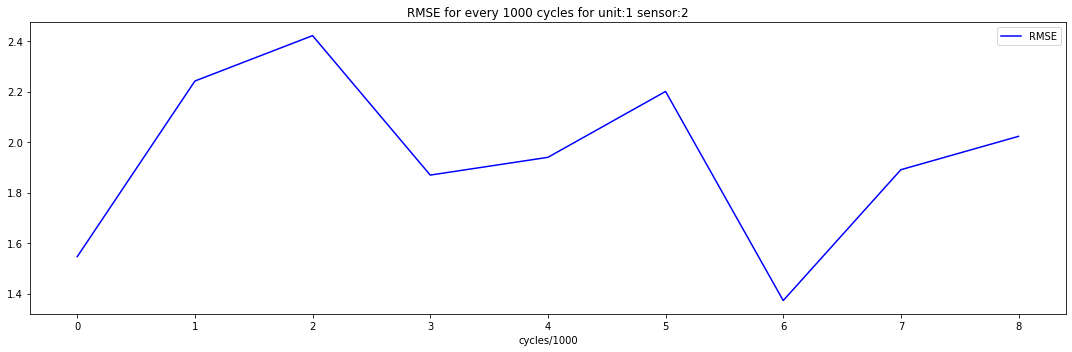

sensor loop: 1
sequence generated, concatenating...
 data_matrix.shape (13039, 7)
 data_matrix.shape (5902, 7)


  0%|          | 9/9999 [00:00<01:52, 88.71it/s]

concatenated!
RLS for adaptation(other cycles)


100%|██████████| 9999/9999 [02:03<00:00, 80.81it/s]


 data_matrix.shape (131034, 7)


  0%|          | 2/9999 [00:00<09:25, 17.67it/s]

RLS for selected sensor


100%|██████████| 9999/9999 [02:23<00:00, 69.67it/s]


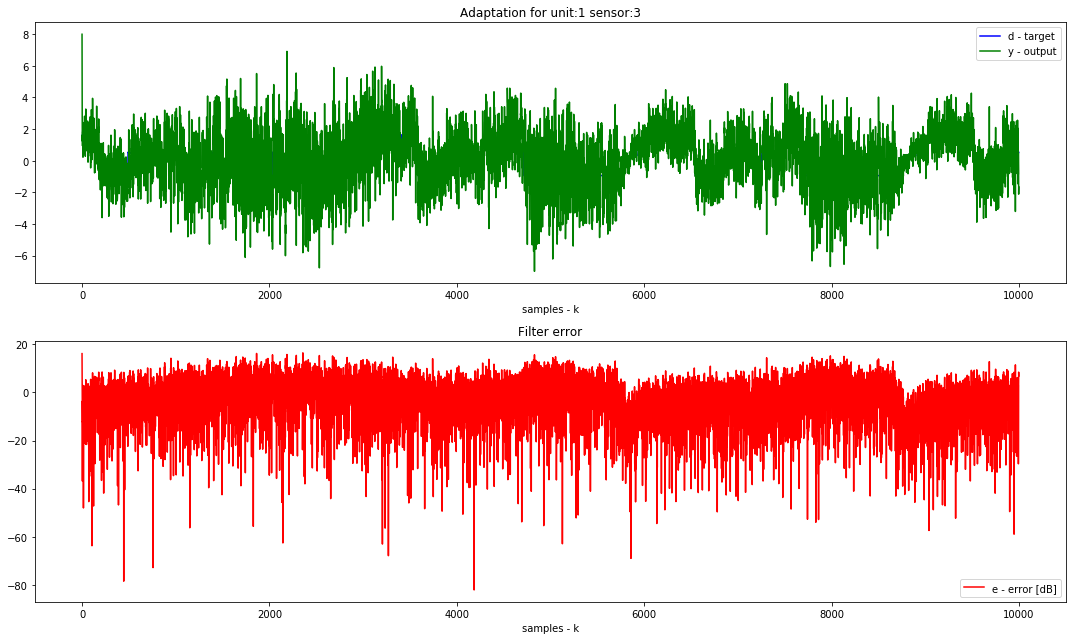

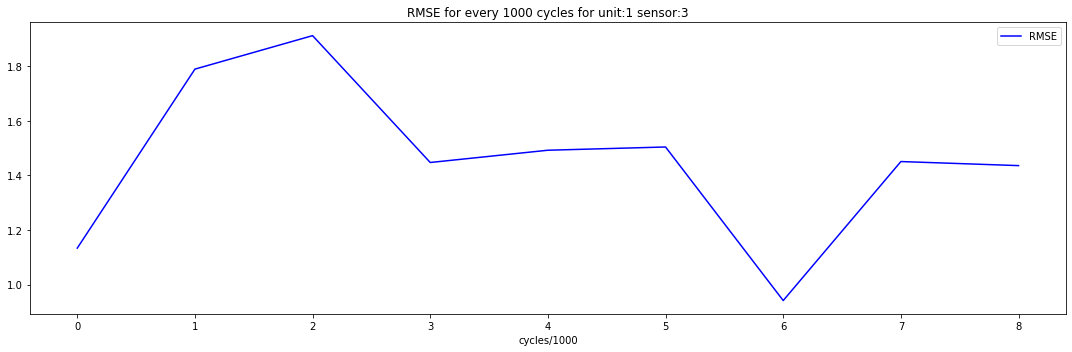

sensor loop: 1
sequence generated, concatenating...
 data_matrix.shape (13039, 7)
 data_matrix.shape (5902, 7)


  0%|          | 8/9999 [00:00<02:21, 70.48it/s]

concatenated!
RLS for adaptation(other cycles)


100%|██████████| 9999/9999 [02:19<00:00, 71.74it/s]


 data_matrix.shape (131034, 7)


  0%|          | 4/9999 [00:00<04:30, 36.92it/s]

RLS for selected sensor


100%|██████████| 9999/9999 [02:25<00:00, 68.92it/s]


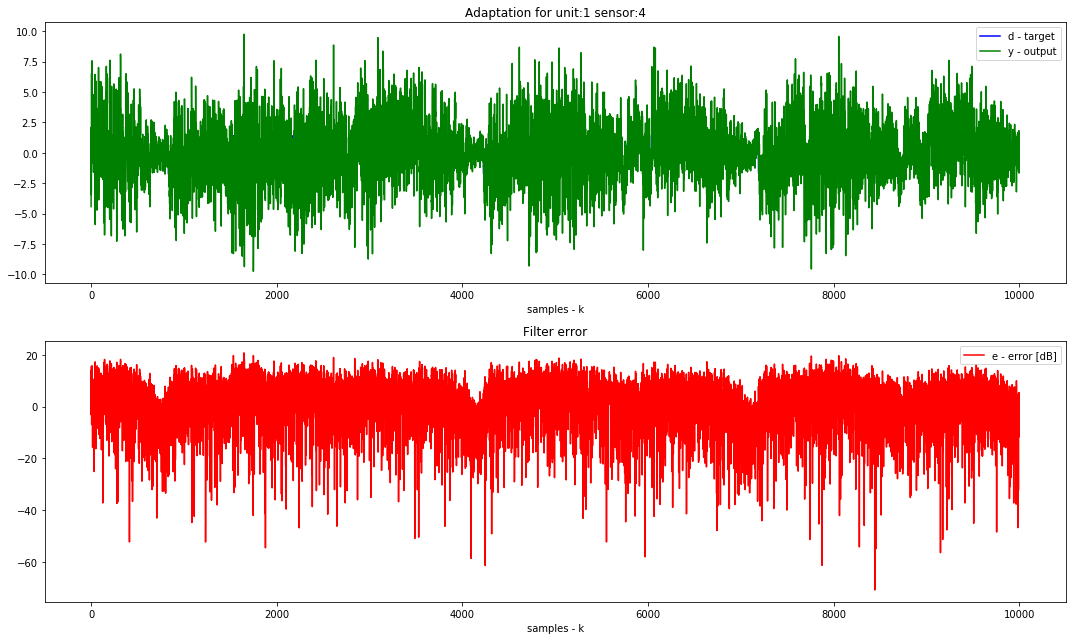

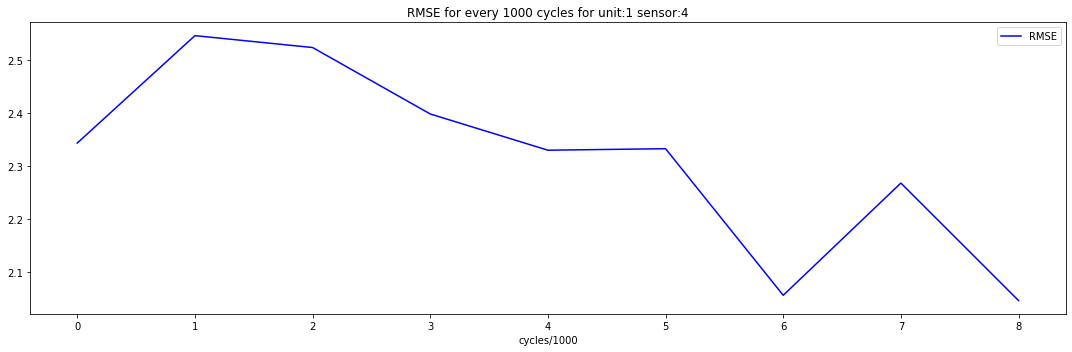

sensor loop: 1
sequence generated, concatenating...
 data_matrix.shape (13039, 7)
 data_matrix.shape (5902, 7)


  0%|          | 5/9999 [00:00<03:37, 45.89it/s]

concatenated!
RLS for adaptation(other cycles)


100%|██████████| 9999/9999 [02:39<00:00, 62.55it/s]


 data_matrix.shape (131034, 7)


  0%|          | 3/9999 [00:00<06:13, 26.75it/s]

RLS for selected sensor


100%|██████████| 9999/9999 [02:21<00:00, 70.86it/s]


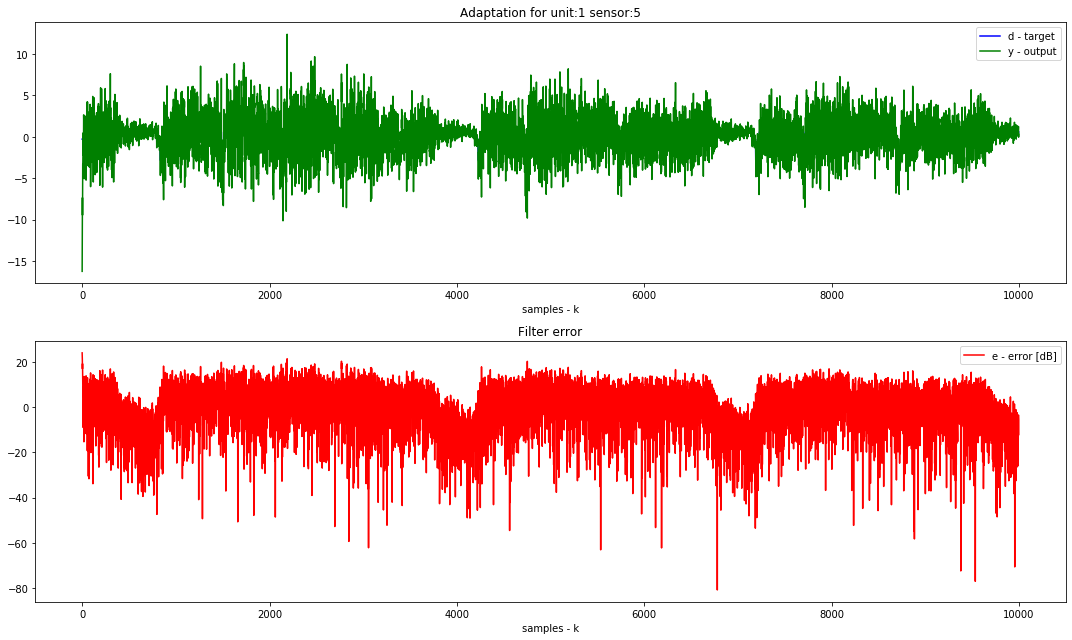

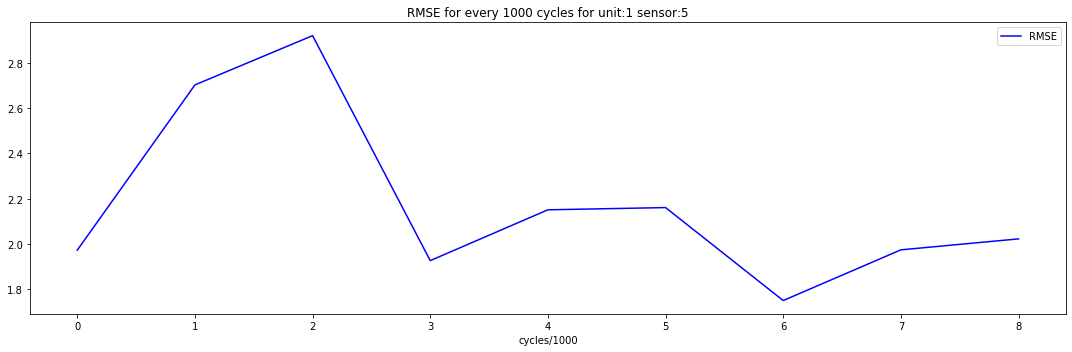

sensor loop: 1
sequence generated, concatenating...
 data_matrix.shape (13039, 7)
 data_matrix.shape (5902, 7)


  0%|          | 10/9999 [00:00<01:45, 94.32it/s]

concatenated!
RLS for adaptation(other cycles)


100%|██████████| 9999/9999 [01:52<00:00, 88.68it/s]


 data_matrix.shape (131034, 7)


  0%|          | 4/9999 [00:00<04:18, 38.66it/s]

RLS for selected sensor


100%|██████████| 9999/9999 [01:56<00:00, 86.09it/s]


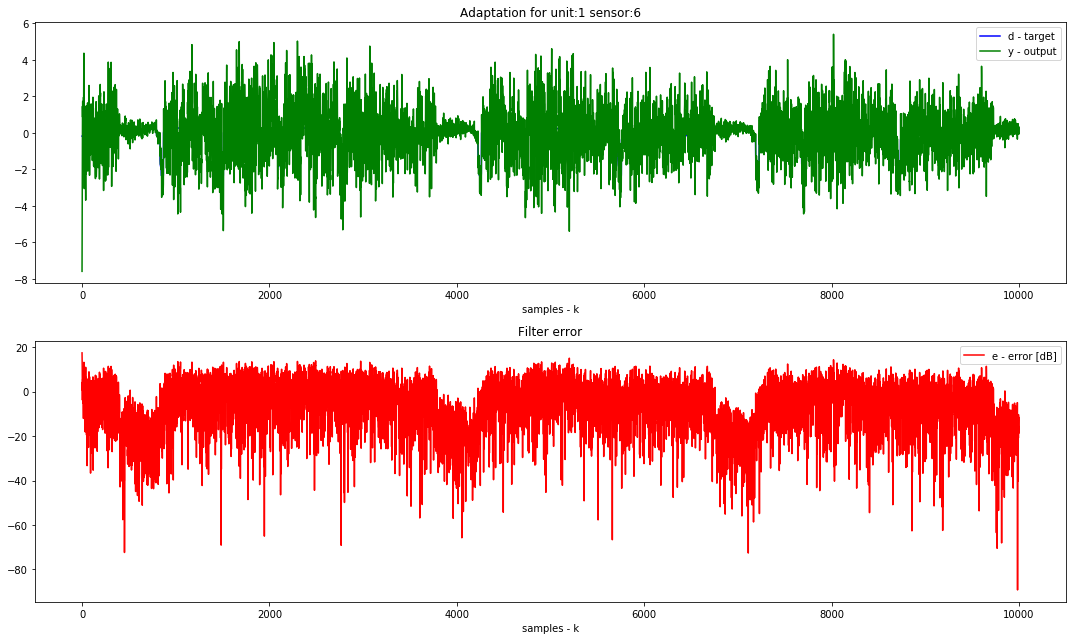

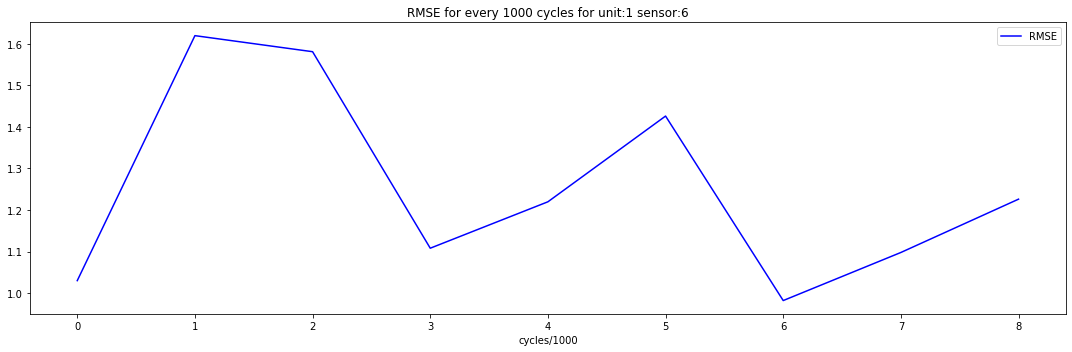

sensor loop: 2
sequence generated, concatenating...
 data_matrix.shape (131034, 7)
 data_matrix.shape (5902, 7)
concatenated!


  0%|          | 2/9999 [00:00<09:03, 18.38it/s]

RLS for adaptation(other cycles)


100%|██████████| 9999/9999 [01:53<00:00, 88.33it/s]


 data_matrix.shape (13039, 7)


  0%|          | 9/9999 [00:00<01:54, 86.93it/s]

RLS for selected sensor


100%|██████████| 9999/9999 [01:46<00:00, 93.58it/s]


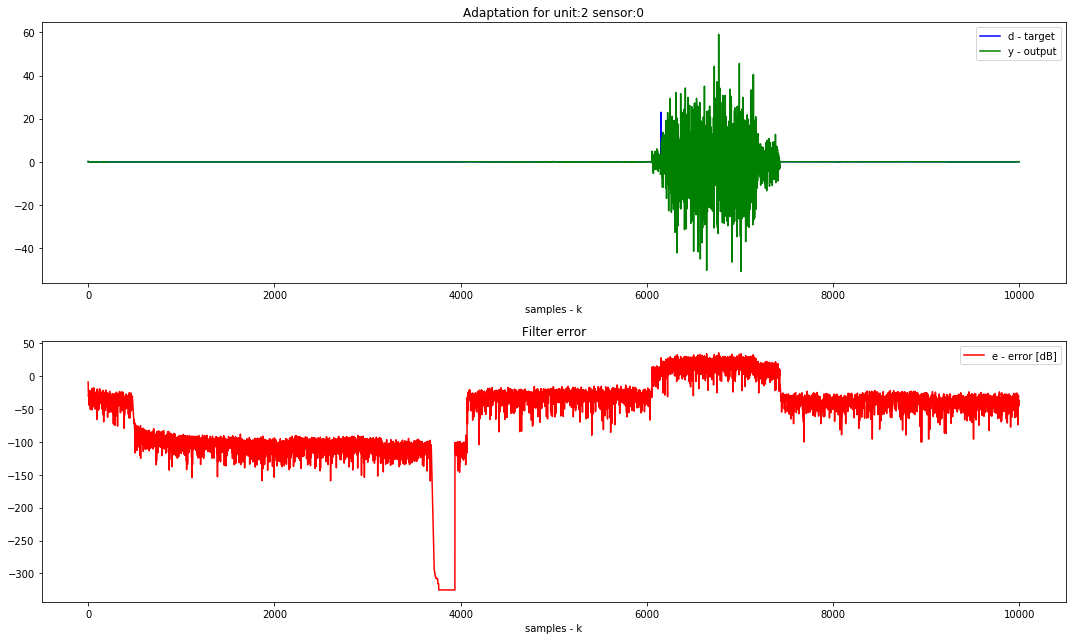

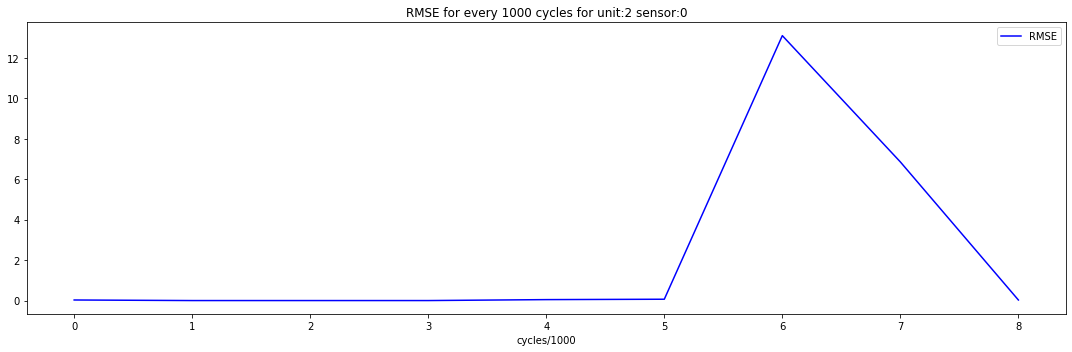

sensor loop: 2
sequence generated, concatenating...
 data_matrix.shape (131034, 7)
 data_matrix.shape (5902, 7)
concatenated!


  0%|          | 1/9999 [00:00<24:26,  6.82it/s]

RLS for adaptation(other cycles)


 59%|█████▉    | 5905/9999 [01:36<00:50, 80.94it/s]

KeyboardInterrupt: 

In [9]:

sensor_idx = ['IONGAUGEPRESSURE','ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT', 'ETCHSUPPRESSORCURRENT', 
              'ETCHGASCHANNEL1READBACK','FLOWCOOLFLOWRATE', 'FLOWCOOLPRESSURE']

for cycle in cycle_list:
    for s_i in range(len(sensor_idx)):
        print ("sensor loop %s: %s", %(s_i,sensor_idx[s_i] ))
            # pick the feature columns
        sensor_dataframe = df_train_ttf_merged.drop(columns=['time','recipe','recipe_step','TTF_FlowCool Pressure Dropped Below Limit'
                                                             ,'TTF_Flowcool Pressure Too High Check Flowcool Pump','TTF_Flowcool leak',
                                                            'failure_cycle'])
        sequence_cols = sensor_dataframe.columns.values.tolist()
    #     print (sequence_cols)

        # generator for the sequences
        # transform each id of the train dataset in a sequence
        seq_gen = (list(gen_sequence(df_train_ttf_merged[df_train_ttf_merged['failure_cycle'] == id], sequence_length, sequence_cols))
                   for id in np.delete(cycle_list,np.where(cycle_list == cycle)))

        # generate sequences and convert to numpy array
        print ("sequence generated, concatenating...")
        seq_array  = np.concatenate(list(seq_gen))
        # seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
    #     print(seq_array)

        print ("concatenated!")

        # generator for the sequences
        # transform each id of the train dataset in a sequence
        target_seq_gen = (list(gen_target(df_train_ttf_merged[df_train_ttf_merged['failure_cycle'] == id], sequence_length, pred_length, sequence_cols))
                   for id in np.delete(cycle_list,np.where(cycle_list == cycle)))

        # print ("target_seq_gen", target_seq_gen)
        # generate sequences and convert to numpy array
        target_seq_array  = np.concatenate(list(target_seq_gen))
        # target_seq_array = np.concatenate(list(target_seq_gen)).astype(np.float32)
    #     print(target_seq_array)
    #     print(target_seq_array.shape)



        # generate RUL labels
        label_gen = [gen_labels(df_train_ttf_merged[df_train_ttf_merged['failure_cycle'] == id], 
                                sequence_length, ['TTF_FlowCool Pressure Dropped Below Limit'])
                     for id in np.delete(cycle_list,np.where(cycle_list == cycle))]

        label_array = np.concatenate(label_gen).astype(np.float32)



        ### Prediction error estimation with RLS

        ## Check data shape (last instance of each unit is excluded)
    #     print ("other sensors input data shape: " , seq_array[:,:,0].shape)
    #     print ("other sensors target measurement shape: ", target_seq_array[:,:,0].shape)
    #     print ("RUL array shape: ", label_array.shape)

        ## Apadt model first
        ## An example how to filter data measured in real-time
        # these two function supplement your online measurment

        s2_input_array = seq_array[-10000:,:,s_i]
        s2_target_array = target_seq_array[-10000:,:,s_i]

        N = s2_input_array.shape[0]
        log_d = np.zeros(N)
        log_y = np.zeros(N)
        filt = pa.filters.FilterRLS(sequence_length, mu=0.5)
        
        print ("RLS for adaptation(other cycles)")
        for k in tqdm(range(N-1)):
            # measure input
#             print ("k",k)
            x = s2_input_array[k]
        #     print (x)
        #     print (x.shape)
            # predict new value
            y = filt.predict(x)
            # do the important stuff with prediction output
            pass    
            # measure output
            d = s2_target_array[k]
        #     print ("d", d)
        #     print ("y", y)
            # update filter
            filt.adapt(d, x)
            # log values
            log_d[k] = d
            log_y[k] = y
            
            
#             time.sleep(0.0001) #Replace this with a real computation
#             update_progress(k / N-1)

#         update_progress(1)

        ## sequence of time series data and target measurement values for selected machine (unit_id_idx)
        seq_gen_m_id = (list(gen_sequence(df_train_ttf_merged[df_train_ttf_merged['failure_cycle'] == cycle], sequence_length, sequence_cols))
                   )

        # generate sequences and convert to numpy array
        seq_array_m_id  = np.array(list(seq_gen_m_id))
        # seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
        # print(seq_array_m_id)
    #     print(seq_array_m_id.shape)



        # generator for the sequences
        # transform each id of the train dataset in a sequence
        target_seq_gen_m_id = (list(gen_target(df_train_ttf_merged[df_train_ttf_merged['failure_cycle'] == cycle], sequence_length, pred_length, sequence_cols))
                   )

        # print ("target_seq_gen", target_seq_gen)
        # generate sequences and convert to numpy array
        target_seq_array_m_id  = np.array(list(target_seq_gen_m_id))
        # target_seq_array = np.concatenate(list(target_seq_gen)).astype(np.float32)
        # print(target_seq_array_m_id)
    #     print(target_seq_array_m_id.shape)


        #only sensor_02

        s2_input_m_id = seq_array_m_id[-10000:,:,s_i]
        s2_target_m_id = target_seq_array_m_id[-10000:,:,s_i]


        N = s2_input_m_id.shape[0]
        log_d = np.zeros(N-1)
        log_y = np.zeros(N-1)
        print ("RLS for selected sensor")
        for k in tqdm(range(N-1)):
            # measure input
#             print ("k",k)
            x = s2_input_m_id[k]
        #     print (x)
        #     print (x.shape)
            # predict new value
            y = filt.predict(x)
            # do the important stuff with prediction output
            pass    
            # measure output
            d = s2_target_m_id[k]
    #         print ("d", d)
    #         print ("y", y)
            # update filter
            filt.adapt(d, x)
            # log values
            log_d[k] = d
            log_y[k] = y





        ### show results
        plt.figure(figsize=(15,9))
        plt.subplot(211);plt.title("Adaptation for unit:%s sensor:%s" %(cycle,s_i));plt.xlabel("samples - k")
        plt.plot(log_y,"g", alpha=0.6,label="y - output")
        plt.plot(log_d,"y", label="d - target");plt.legend()
        plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
        plt.plot(10*np.log10((log_d-log_y)**2),"r", label="e - error [dB]")
        plt.legend(); plt.tight_layout(); plt.show()




        ## Numerical evaluation


        y_actual = log_d
        y_predicted = log_y

        first_n_rmse = sqrt(mean_squared_error(y_actual[:n], y_predicted[:n]))
        last_n_rmse = sqrt(mean_squared_error(y_actual[-n:], y_predicted[-n:]))

    #     print ("first %s cycles RMSE of prediction: %s" %(n,first_n_rmse))
    #     print ("last %s cycles RMSE of prediction: %s" %(n,last_n_rmse))





        '''
        RMSE evaluation with fixed window size n
        '''

        # s2_input_m_id = seq_array_m_id[:,:,sensor_idx]
        # s2_target_m_id = target_seq_array_m_id[:,:,sensor_idx]
        # x = s2_input_m_id
        # d = s2_target_m_id

        # y, e, w = filt.run(d, x)
        # y_actual = d
        # y_predicted = y





    #     print (len(y_predicted))
    #     print (int(len(y_predicted)/n))
        rmse_list = []
        for iter in range(int(len(y_predicted)/n)) :
            rmse_temp = sqrt(mean_squared_error(y_actual[n*iter:n*(iter+1)], y_predicted[n*iter:n*(iter+1)]))
            rmse_list.append(rmse_temp)



    #     print (rmse_list)

        ### show results
        fig_rmse = plt.figure(figsize=(15,5))
        plt.plot(rmse_list,"b", label="RMSE")
        plt.xlabel("cycles/%s" %n)
        plt.title("RMSE for every %s cycles for unit:%s sensor:%s" %(n,cycle,s_i))
        plt.legend(); plt.tight_layout(); plt.show()
        fig_rmse.savefig("plots/rmse_u_%s_s_%s.png" %(cycle,s_i))
